In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvYXB1cnZhL0RvY3VtZW50cy9Nb250ZS1DYXJsby1NZXRob2RzL2NoYXB0ZXJz'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/home/apurva/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1733935784.1579142, "/home/apurva/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1733935784.1579142, "/home/apurva/miniconda3/lib/python3.12/zipimport.py": 1733935783.8019211, "/home/apurva/miniconda3/lib/python3.12/codecs.py": 1733935783.6539242, "/home/apurva/miniconda3/lib/python3.12/encodings/aliases.py": 1733935783.917919, "/home/apurva/miniconda3/lib/python3.12/encodings/__init__.py": 1733935783.9739177, "/home/apurva/miniconda3/lib/python3.12/encodings/utf_8.py": 1733935784.0459163, "/home/apurva/miniconda3/lib/python3.12/abc.py": 1733935783.6419244, "/home/apurva/miniconda3/lib/python3.12/io.py": 1733935783.7019231, "/home/apurva/miniconda3/lib/python3.12/stat.py": 1733935783.765922, "/home/apurva/miniconda3/lib/python3.12/_collections_abc.py": 1733935783.6579242, "/home/apurva/miniconda3/lib/python3.12/genericpath.py": 1733935783.6859236, "/home/apurva/miniconda3/lib/python3.12/posixpath.py": 1733

/tmp/ipykernel_162603/1545931282.py:25: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



In [2]:
#| code-summary: "Show code for importance sampling example"

import numpy as np
from scipy.stats import norm, expon
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
N = 4000
shift = 2
scale = 1
mu, sigma = 0, 1  # Standard normal parameters

# Define distributions
target_pdf = lambda x: norm.pdf(x, loc=mu, scale=sigma)
proposal_pdf = lambda x: expon.pdf(x - shift, scale=scale) * (x > shift)
proposal_rvs = lambda size: expon.rvs(scale=scale, size=size) + shift

# Importance Sampling
samples_is = proposal_rvs(N)
weights = target_pdf(samples_is) / proposal_pdf(samples_is)

# Estimate probability P(X > 2)
indicator = samples_is > 2  # Always true for our proposal
estimate_is = np.mean(indicator * weights)

# Crude Monte Carlo (direct sampling from normal)
samples_crude = np.random.normal(loc=mu, scale=sigma, size=N)
estimate_crude = np.mean(samples_crude > 2)

# Compute running averages
running_avg_is = np.cumsum(indicator * weights) / np.arange(1, N + 1)
running_avg_crude = np.cumsum(samples_crude > 2) / np.arange(1, N + 1)

# True value
true_value = 1 - norm.cdf(2)

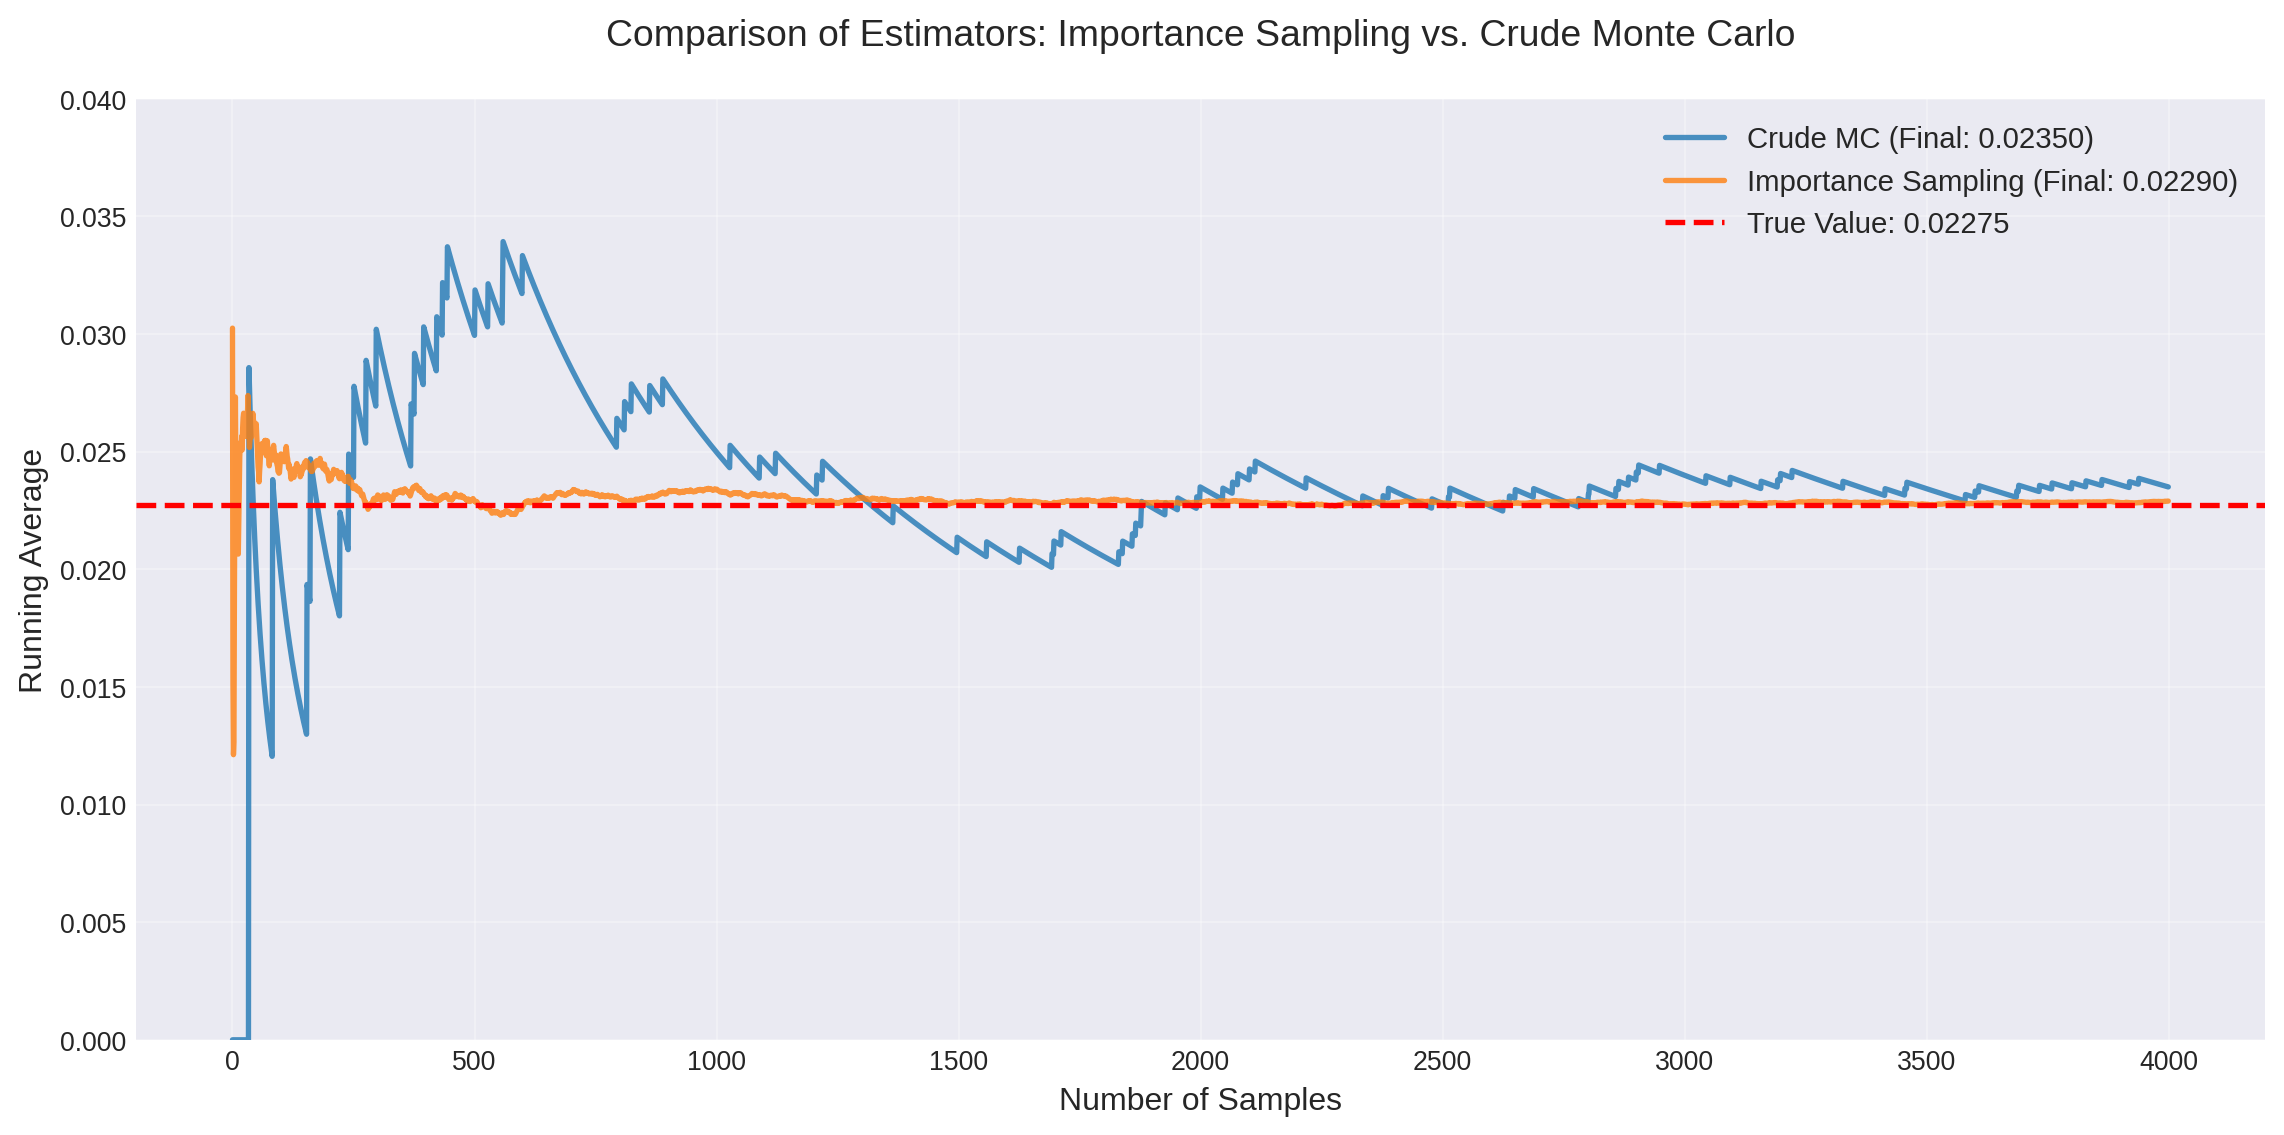


Importance Sampling:
  Estimate: 0.02290
  Variance: 7.94e-08
  Relative Error: 0.012

Crude Monte Carlo:
  Estimate: 0.02350
  Variance: 5.74e-06
  Relative Error: 0.102

Variance Reduction Factor: 72.2x


In [3]:
#| code-summary: "Show plotting code"

# Create figure with improved styling
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-darkgrid')

# Plot running averages
plt.plot(running_avg_crude, label=f'Crude MC (Final: {estimate_crude:.5f})', 
         alpha=0.8, linewidth=2)
plt.plot(running_avg_is, label=f'Importance Sampling (Final: {estimate_is:.5f})', 
         alpha=0.8, linewidth=2)
plt.axhline(y=true_value, color='red', linestyle='--', 
            label=f'True Value: {true_value:.5f}', linewidth=2)

# Formatting
plt.xlabel('Number of Samples', fontsize=12)
plt.ylabel('Running Average', fontsize=12)
plt.title('Comparison of Estimators: Importance Sampling vs. Crude Monte Carlo', 
          fontsize=14, pad=20)
plt.legend(fontsize=11, loc='best')
plt.ylim(-0.00, 0.04)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate and display variance metrics
variance_is = np.var(indicator * weights) / N
variance_crude = np.var(samples_crude > 2) / N
relative_error_is = np.sqrt(variance_is) / estimate_is if estimate_is > 0 else np.inf
relative_error_crude = np.sqrt(variance_crude) / estimate_crude if estimate_crude > 0 else np.inf

print(f"\nImportance Sampling:")
print(f"  Estimate: {estimate_is:.5f}")
print(f"  Variance: {variance_is:.2e}")
print(f"  Relative Error: {relative_error_is:.3f}")

print(f"\nCrude Monte Carlo:")
print(f"  Estimate: {estimate_crude:.5f}")
print(f"  Variance: {variance_crude:.2e}")
print(f"  Relative Error: {relative_error_crude:.3f}")

print(f"\nVariance Reduction Factor: {variance_crude/variance_is:.1f}x")

In [4]:
#| code-summary: "Show code for antithetic variates example"

# Function to integrate
def f(x):
    return 1 / (1 + x**2)

# Set random seed
np.random.seed(42)

# Number of samples
N = 200

# Standard Monte Carlo
X_standard = np.random.uniform(0, 1, N)
estimates_standard = f(X_standard)
estimate_standard = np.mean(estimates_standard)

# Antithetic Variates Monte Carlo
X = np.random.uniform(0, 1, N//2)
X_antithetic = 1 - X  # Antithetic pairs
estimates_anti = (f(X) + f(X_antithetic)) / 2
estimate_antithetic = np.mean(estimates_anti)

# True value (arctan(1) - arctan(0) = π/4)
true_value = np.pi / 4

# Compute variances
var_standard = np.var(estimates_standard) / N
var_antithetic = np.var(estimates_anti) / (N//2)

# Running averages
running_avg_standard = np.cumsum(f(X_standard[:N//2])) / np.arange(1, N//2 + 1)
running_avg_anti = np.cumsum(estimates_anti) / np.arange(1, N//2 + 1)

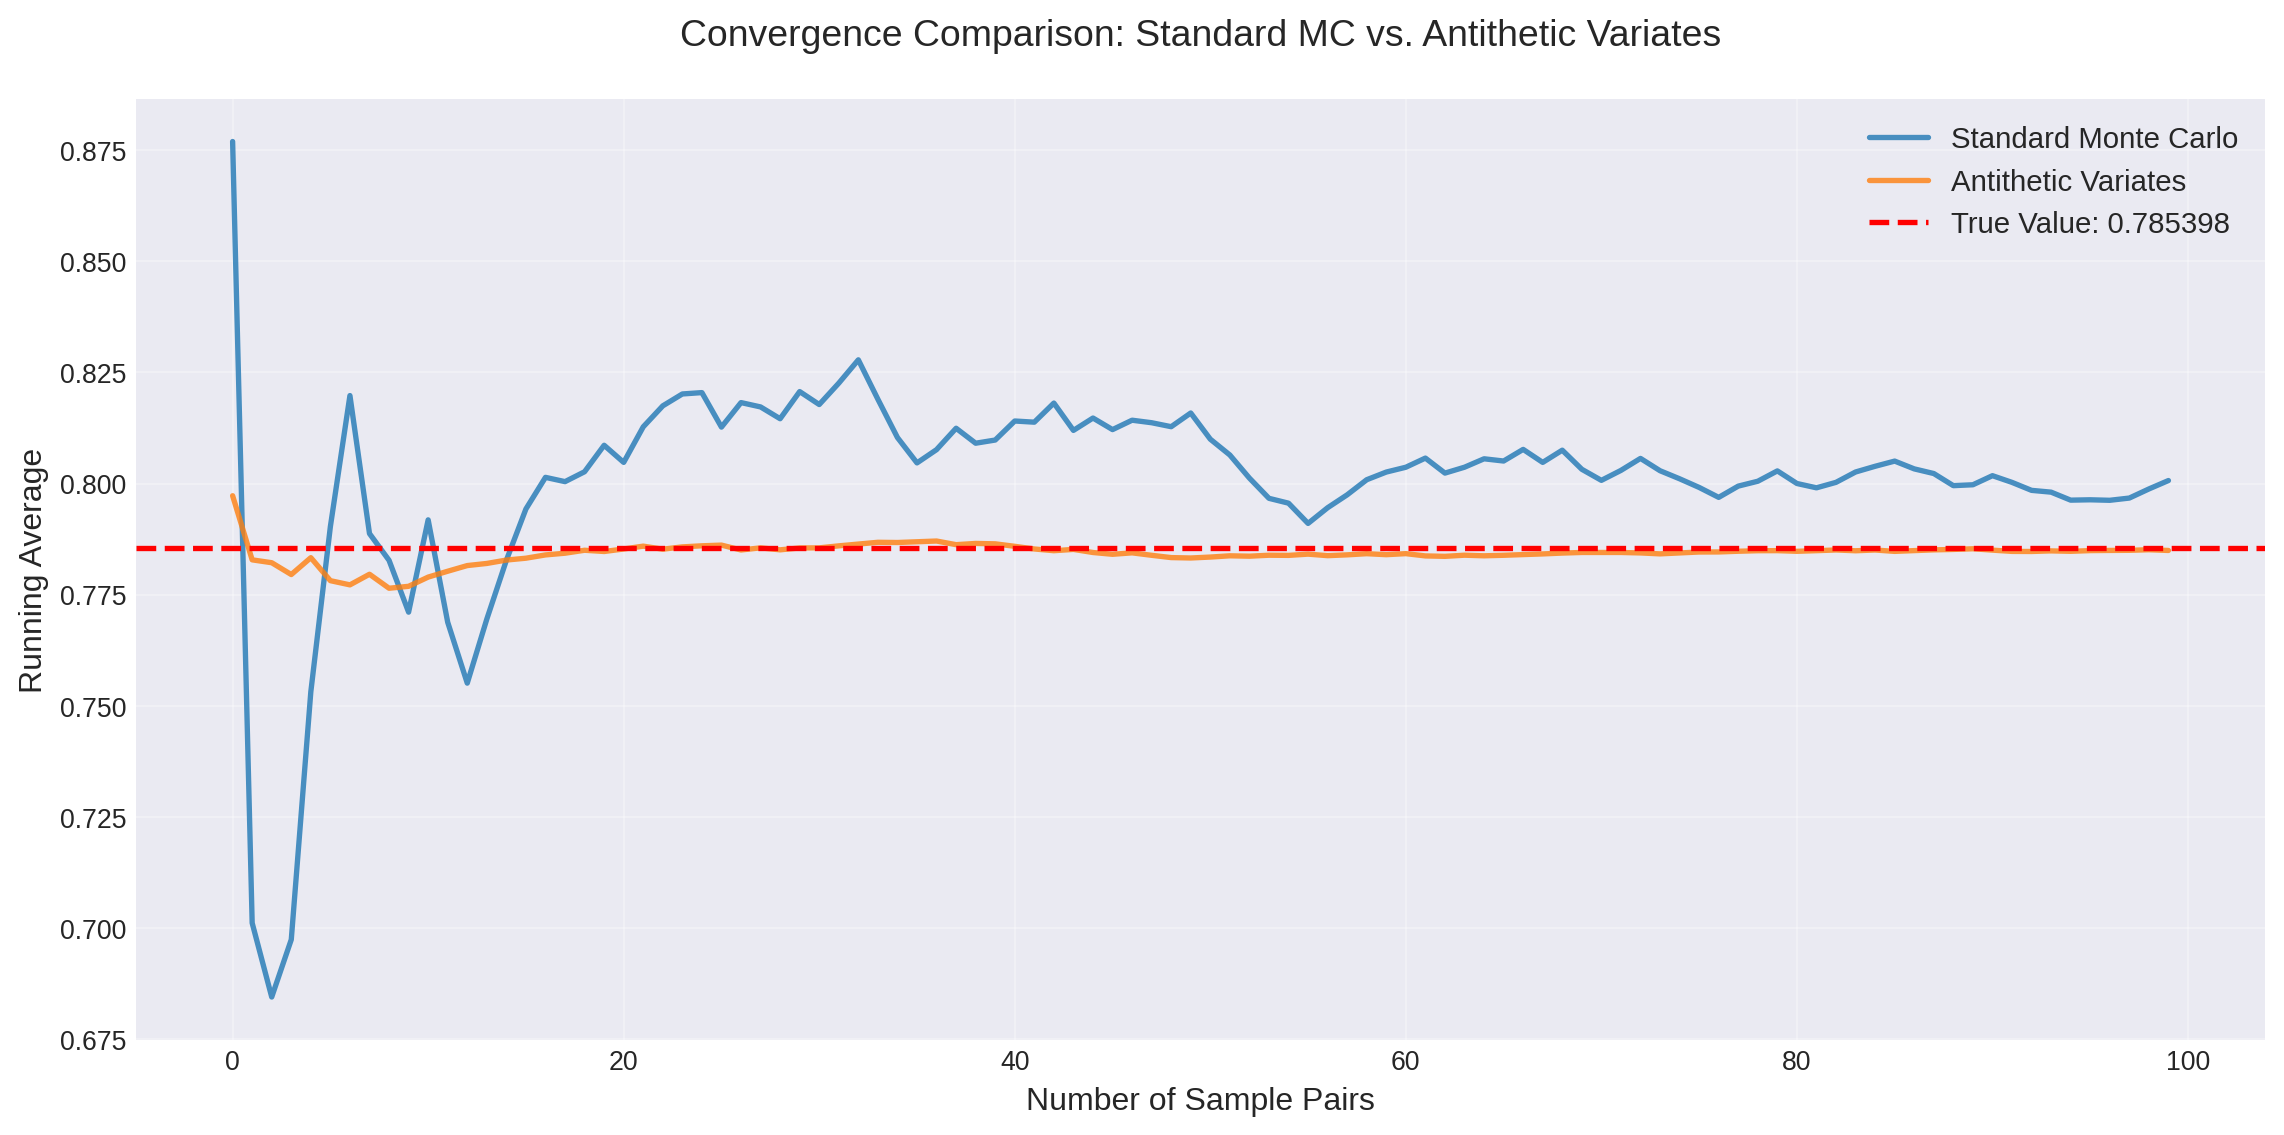


Standard Monte Carlo:
  Estimate: 0.793935
  Variance: 1.340866e-04

Antithetic Variates:
  Estimate: 0.784943
  Variance: 2.182878e-06

True Value: 0.785398
Variance Reduction Factor: 61.43x


In [5]:
#| code-summary: "Show plotting code"

# Create figure
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-darkgrid')

# Plot running averages
plt.plot(running_avg_standard, label='Standard Monte Carlo', 
         alpha=0.8, linewidth=2)
plt.plot(running_avg_anti, label='Antithetic Variates', 
         alpha=0.8, linewidth=2)
plt.axhline(y=true_value, color='red', linestyle='--', 
            label=f'True Value: {true_value:.6f}', linewidth=2)

# Formatting
plt.xlabel('Number of Sample Pairs', fontsize=12)
plt.ylabel('Running Average', fontsize=12)
plt.title('Convergence Comparison: Standard MC vs. Antithetic Variates', 
          fontsize=14, pad=20)
plt.legend(fontsize=11, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display results
print(f"\nStandard Monte Carlo:")
print(f"  Estimate: {estimate_standard:.6f}")
print(f"  Variance: {var_standard:.6e}")

print(f"\nAntithetic Variates:")
print(f"  Estimate: {estimate_antithetic:.6f}")
print(f"  Variance: {var_antithetic:.6e}")

print(f"\nTrue Value: {true_value:.6f}")
print(f"Variance Reduction Factor: {var_standard / var_antithetic:.2f}x")

In [6]:
#| code-summary: "Show code for control variates example"

# Function to integrate
def f(x):
    return x * np.exp(-x)

def h(x):
    return x

# Set random seed
np.random.seed(42)

# Number of samples
N = 1000

# Generate samples
X = np.random.uniform(0, 1, N)

# Known expectation of control variate
h_0 = 0.5  # E[X] for X ~ Uniform(0,1)

# Estimate optimal beta using pilot samples
pilot_size = 100
X_pilot = X[:pilot_size]
f_pilot = f(X_pilot)
h_pilot = h(X_pilot)
beta_est = np.cov(f_pilot, h_pilot)[0,1] / np.var(h_pilot)

# Try different beta values including the estimated one
beta_values = [0, 0.2, beta_est, 0.5, 0.7]
results = {}

for beta in beta_values:
    # Control variate estimator
    cv_samples = f(X) - beta * (h(X) - h_0)
    estimate = np.mean(cv_samples)
    variance = np.var(cv_samples) / N
    results[beta] = {'estimate': estimate, 'variance': variance}

# Standard Monte Carlo
standard_samples = f(X)
estimate_standard = np.mean(standard_samples)
var_standard = np.var(standard_samples) / N

# True value: integral of x*e^(-x) from 0 to 1 = 1 - 2/e
true_value = 1 - 2/np.e

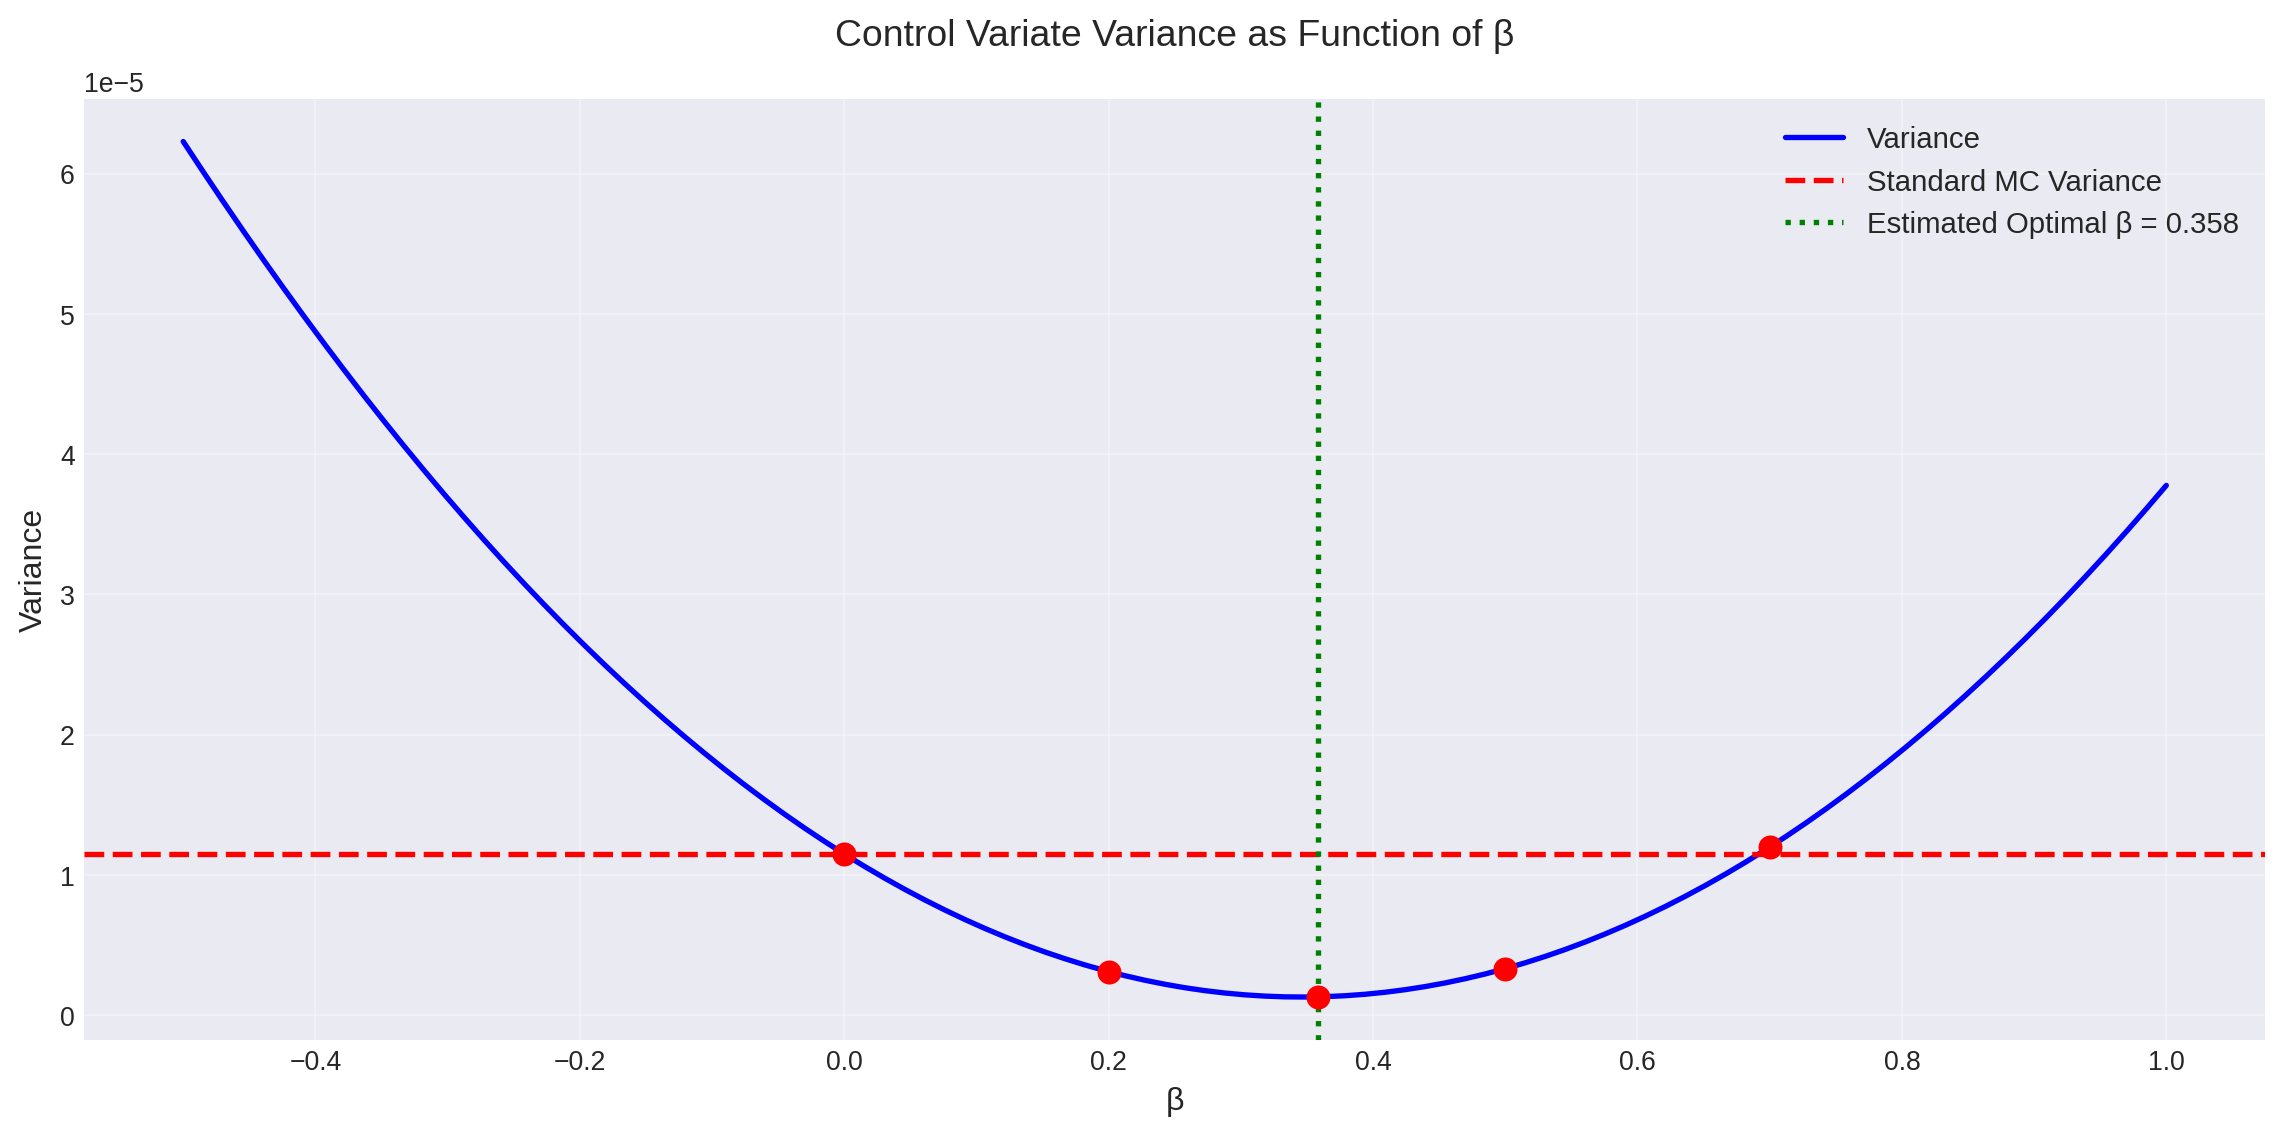


True Value: 0.264241

Standard Monte Carlo:
  Estimate: 0.259941
  Variance: 1.148343e-05

Control Variates Results:
  β = 0.000: Estimate = 0.259941, Variance = 1.148343e-05, Reduction = 1.00x
  β = 0.200: Estimate = 0.261890, Variance = 3.098287e-06, Reduction = 3.71x
  β = 0.358: Estimate = 0.263430, Variance = 1.296755e-06, Reduction = 8.86x
  β = 0.500: Estimate = 0.264813, Variance = 3.309411e-06, Reduction = 3.47x
  β = 0.700: Estimate = 0.266761, Variance = 1.197605e-05, Reduction = 0.96x


In [7]:
#| code-summary: "Show plotting code"

# Create figure for variance comparison
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-darkgrid')

# Plot variance as function of beta
beta_range = np.linspace(-0.5, 1.0, 100)
variances = []

for b in beta_range:
    cv_samples = f(X) - b * (h(X) - h_0)
    variances.append(np.var(cv_samples) / N)

plt.plot(beta_range, variances, 'b-', linewidth=2, label='Variance')
plt.axhline(y=var_standard, color='red', linestyle='--', 
            label='Standard MC Variance', linewidth=2)
plt.axvline(x=beta_est, color='green', linestyle=':', 
            label=f'Estimated Optimal β = {beta_est:.3f}', linewidth=2)

# Mark tested beta values
for beta, res in results.items():
    plt.plot(beta, res['variance'], 'ro', markersize=8)

plt.xlabel('β', fontsize=12)
plt.ylabel('Variance', fontsize=12)
plt.title('Control Variate Variance as Function of β', fontsize=14, pad=20)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display results
print(f"\nTrue Value: {true_value:.6f}")
print(f"\nStandard Monte Carlo:")
print(f"  Estimate: {estimate_standard:.6f}")
print(f"  Variance: {var_standard:.6e}")

print(f"\nControl Variates Results:")
for beta, res in sorted(results.items()):
    print(f"  β = {beta:.3f}: Estimate = {res['estimate']:.6f}, "
          f"Variance = {res['variance']:.6e}, "
          f"Reduction = {var_standard/res['variance']:.2f}x")

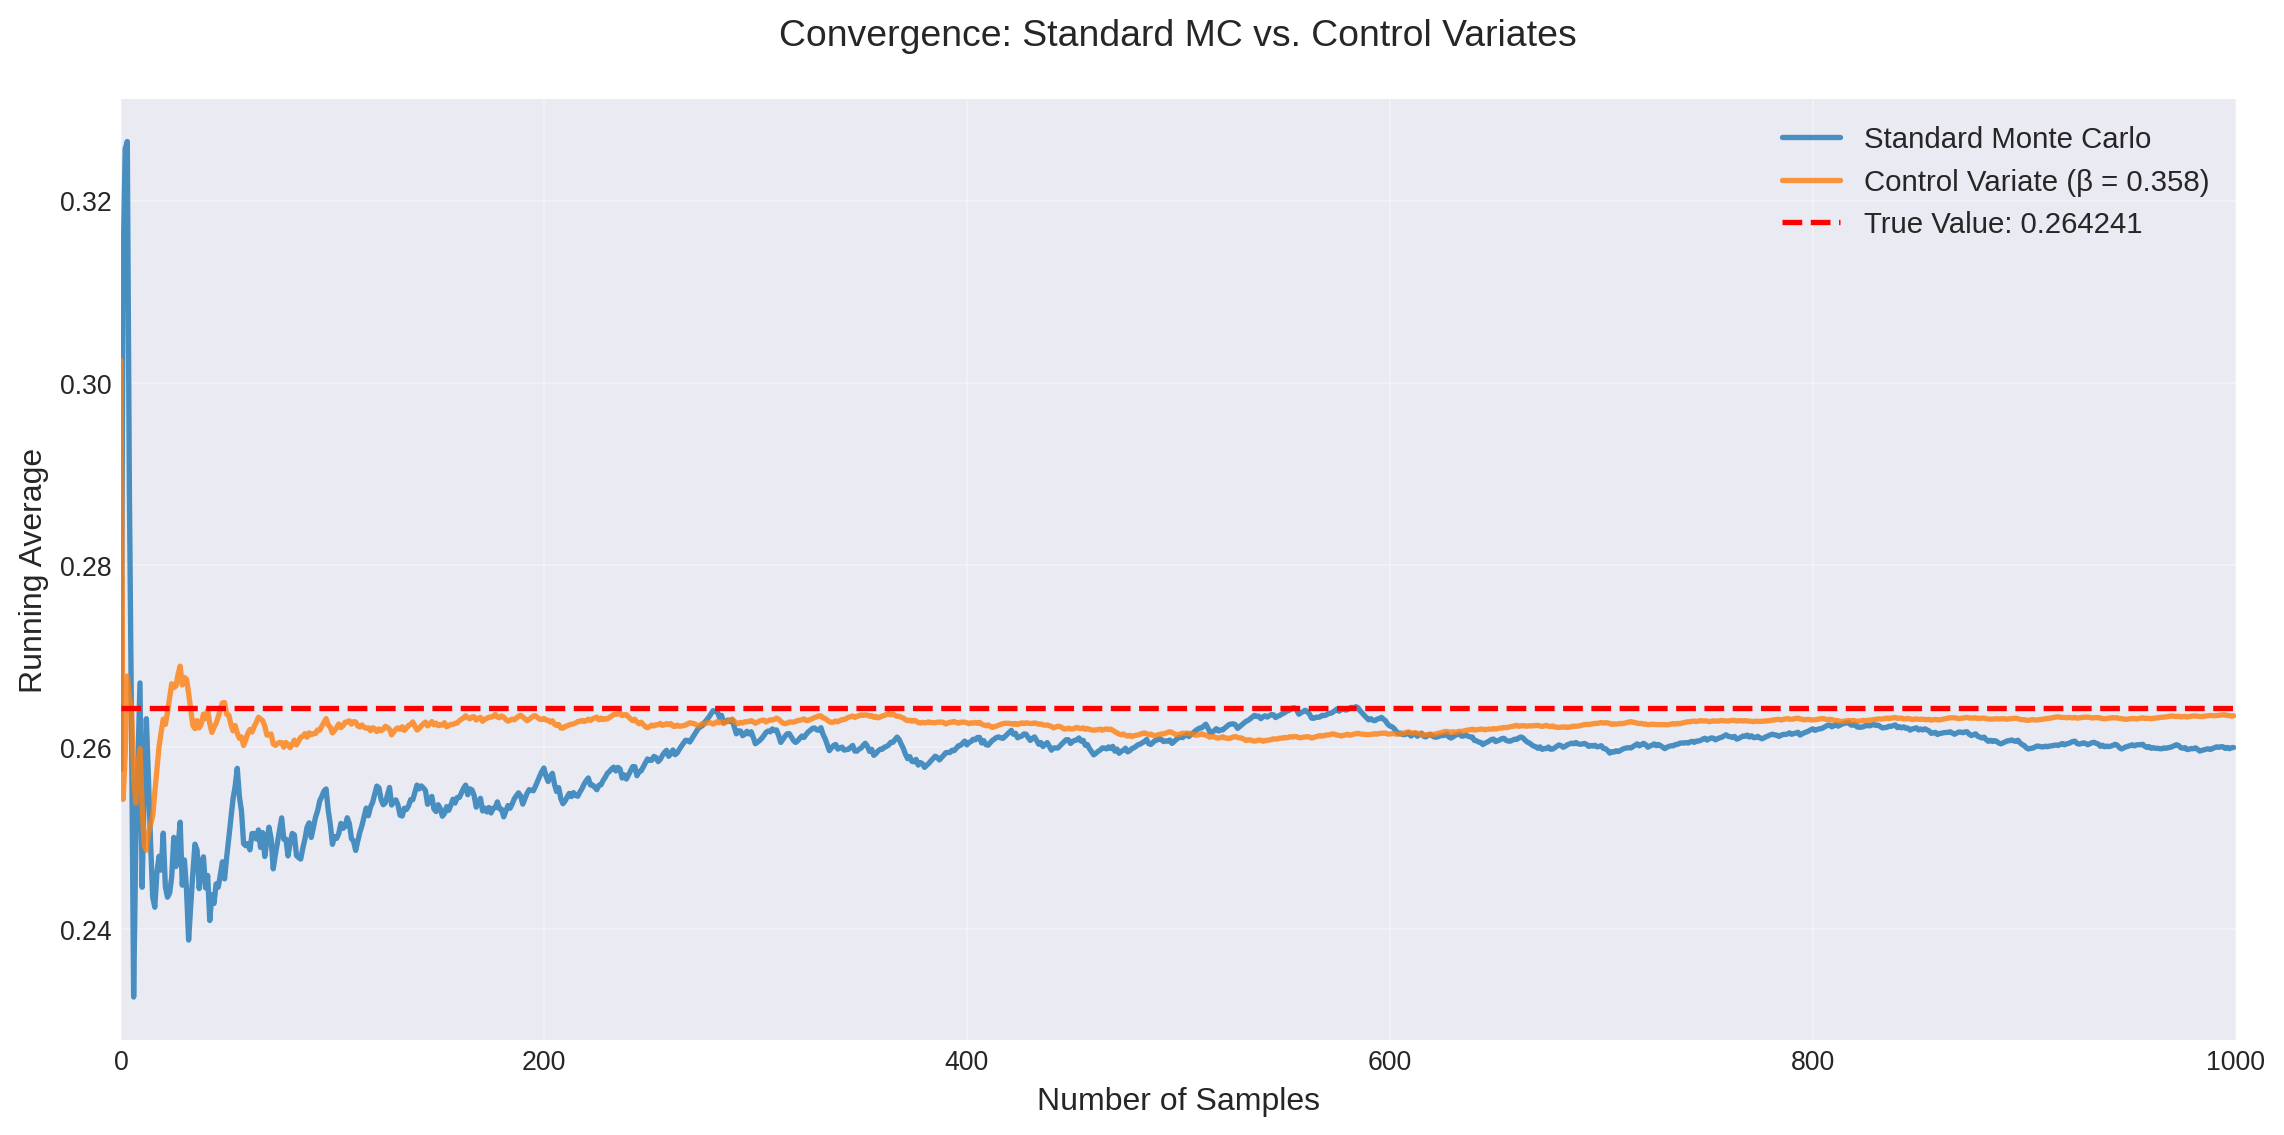

In [8]:
#| code-summary: "Show convergence comparison"

# Plot convergence comparison
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-darkgrid')

# Running averages
running_avg_standard = np.cumsum(f(X)) / np.arange(1, N + 1)
running_avg_cv = np.cumsum(f(X) - beta_est * (h(X) - h_0)) / np.arange(1, N + 1)

plt.plot(running_avg_standard, label='Standard Monte Carlo', 
         alpha=0.8, linewidth=2)
plt.plot(running_avg_cv, label=f'Control Variate (β = {beta_est:.3f})', 
         alpha=0.8, linewidth=2)
plt.axhline(y=true_value, color='red', linestyle='--', 
            label=f'True Value: {true_value:.6f}', linewidth=2)

plt.xlabel('Number of Samples', fontsize=12)
plt.ylabel('Running Average', fontsize=12)
plt.title('Convergence: Standard MC vs. Control Variates', fontsize=14, pad=20)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim(0, N)
plt.tight_layout()
plt.show()

In [9]:
#| code-summary: "Show code for common random numbers example"

import numpy as np
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(42)

# Simulate M/M/1 queue waiting times
def simulate_mm1_queue(arrival_times, service_requirements, service_rate):
    """
    Simulate M/M/1 queue and return waiting times.
    arrival_times: inter-arrival times
    service_requirements: service time requirements (before scaling by rate)
    service_rate: the service rate of the system
    """
    n = len(arrival_times)
    arrival_epochs = np.cumsum(arrival_times)
    service_times = service_requirements / service_rate
    
    waiting_times = np.zeros(n)
    departure_times = np.zeros(n)
    
    # First customer
    waiting_times[0] = 0
    departure_times[0] = arrival_epochs[0] + service_times[0]
    
    # Subsequent customers
    for i in range(1, n):
        # Waiting time = max(0, previous departure - current arrival)
        waiting_times[i] = max(0, departure_times[i-1] - arrival_epochs[i])
        departure_times[i] = arrival_epochs[i] + waiting_times[i] + service_times[i]
    
    return waiting_times

# Parameters
n_customers = 1000
n_replications = 100
arrival_rate = 1.0  # λ
service_rate_1 = 1.5  # μ₁
service_rate_2 = 2.0  # μ₂

# True mean waiting times (M/M/1 formula: W = 1/(μ-λ))
true_wait_1 = 1 / (service_rate_1 - arrival_rate)
true_wait_2 = 1 / (service_rate_2 - arrival_rate)
true_difference = true_wait_1 - true_wait_2

print(f"Theoretical waiting times:")
print(f"  System 1 (μ={service_rate_1}): {true_wait_1:.4f}")
print(f"  System 2 (μ={service_rate_2}): {true_wait_2:.4f}")
print(f"  Difference: {true_difference:.4f}")

# Run simulations with both methods
differences_crn = []
differences_indep = []

for rep in range(n_replications):
    # Generate common random numbers
    inter_arrivals = np.random.exponential(1/arrival_rate, n_customers)
    service_requirements = np.random.exponential(1.0, n_customers)
    
    # CRN: Use same random numbers for both systems
    wait_1_crn = simulate_mm1_queue(inter_arrivals, service_requirements, service_rate_1)
    wait_2_crn = simulate_mm1_queue(inter_arrivals, service_requirements, service_rate_2)
    differences_crn.append(np.mean(wait_1_crn) - np.mean(wait_2_crn))
    
    # Independent: Generate new random numbers for second system
    inter_arrivals_2 = np.random.exponential(1/arrival_rate, n_customers)
    service_requirements_2 = np.random.exponential(1.0, n_customers)
    
    wait_1_indep = simulate_mm1_queue(inter_arrivals, service_requirements, service_rate_1)
    wait_2_indep = simulate_mm1_queue(inter_arrivals_2, service_requirements_2, service_rate_2)
    differences_indep.append(np.mean(wait_1_indep) - np.mean(wait_2_indep))

# Convert to arrays
differences_crn = np.array(differences_crn)
differences_indep = np.array(differences_indep)

# Calculate statistics
mean_crn = np.mean(differences_crn)
var_crn = np.var(differences_crn)
mean_indep = np.mean(differences_indep)
var_indep = np.var(differences_indep)

print(f"\nSimulation results ({n_replications} replications):")
print(f"\nCommon Random Numbers:")
print(f"  Mean difference: {mean_crn:.4f}")
print(f"  Variance: {var_crn:.6f}")
print(f"  Std deviation: {np.sqrt(var_crn):.4f}")

print(f"\nIndependent Sampling:")
print(f"  Mean difference: {mean_indep:.4f}")
print(f"  Variance: {var_indep:.6f}")
print(f"  Std deviation: {np.sqrt(var_indep):.4f}")

print(f"\nVariance Reduction Factor: {var_indep/var_crn:.2f}x")

Theoretical waiting times:
  System 1 (μ=1.5): 2.0000
  System 2 (μ=2.0): 1.0000
  Difference: 1.0000



Simulation results (100 replications):

Common Random Numbers:
  Mean difference: 0.8210
  Variance: 0.057241
  Std deviation: 0.2393

Independent Sampling:
  Mean difference: 0.8118
  Variance: 0.106401
  Std deviation: 0.3262

Variance Reduction Factor: 1.86x


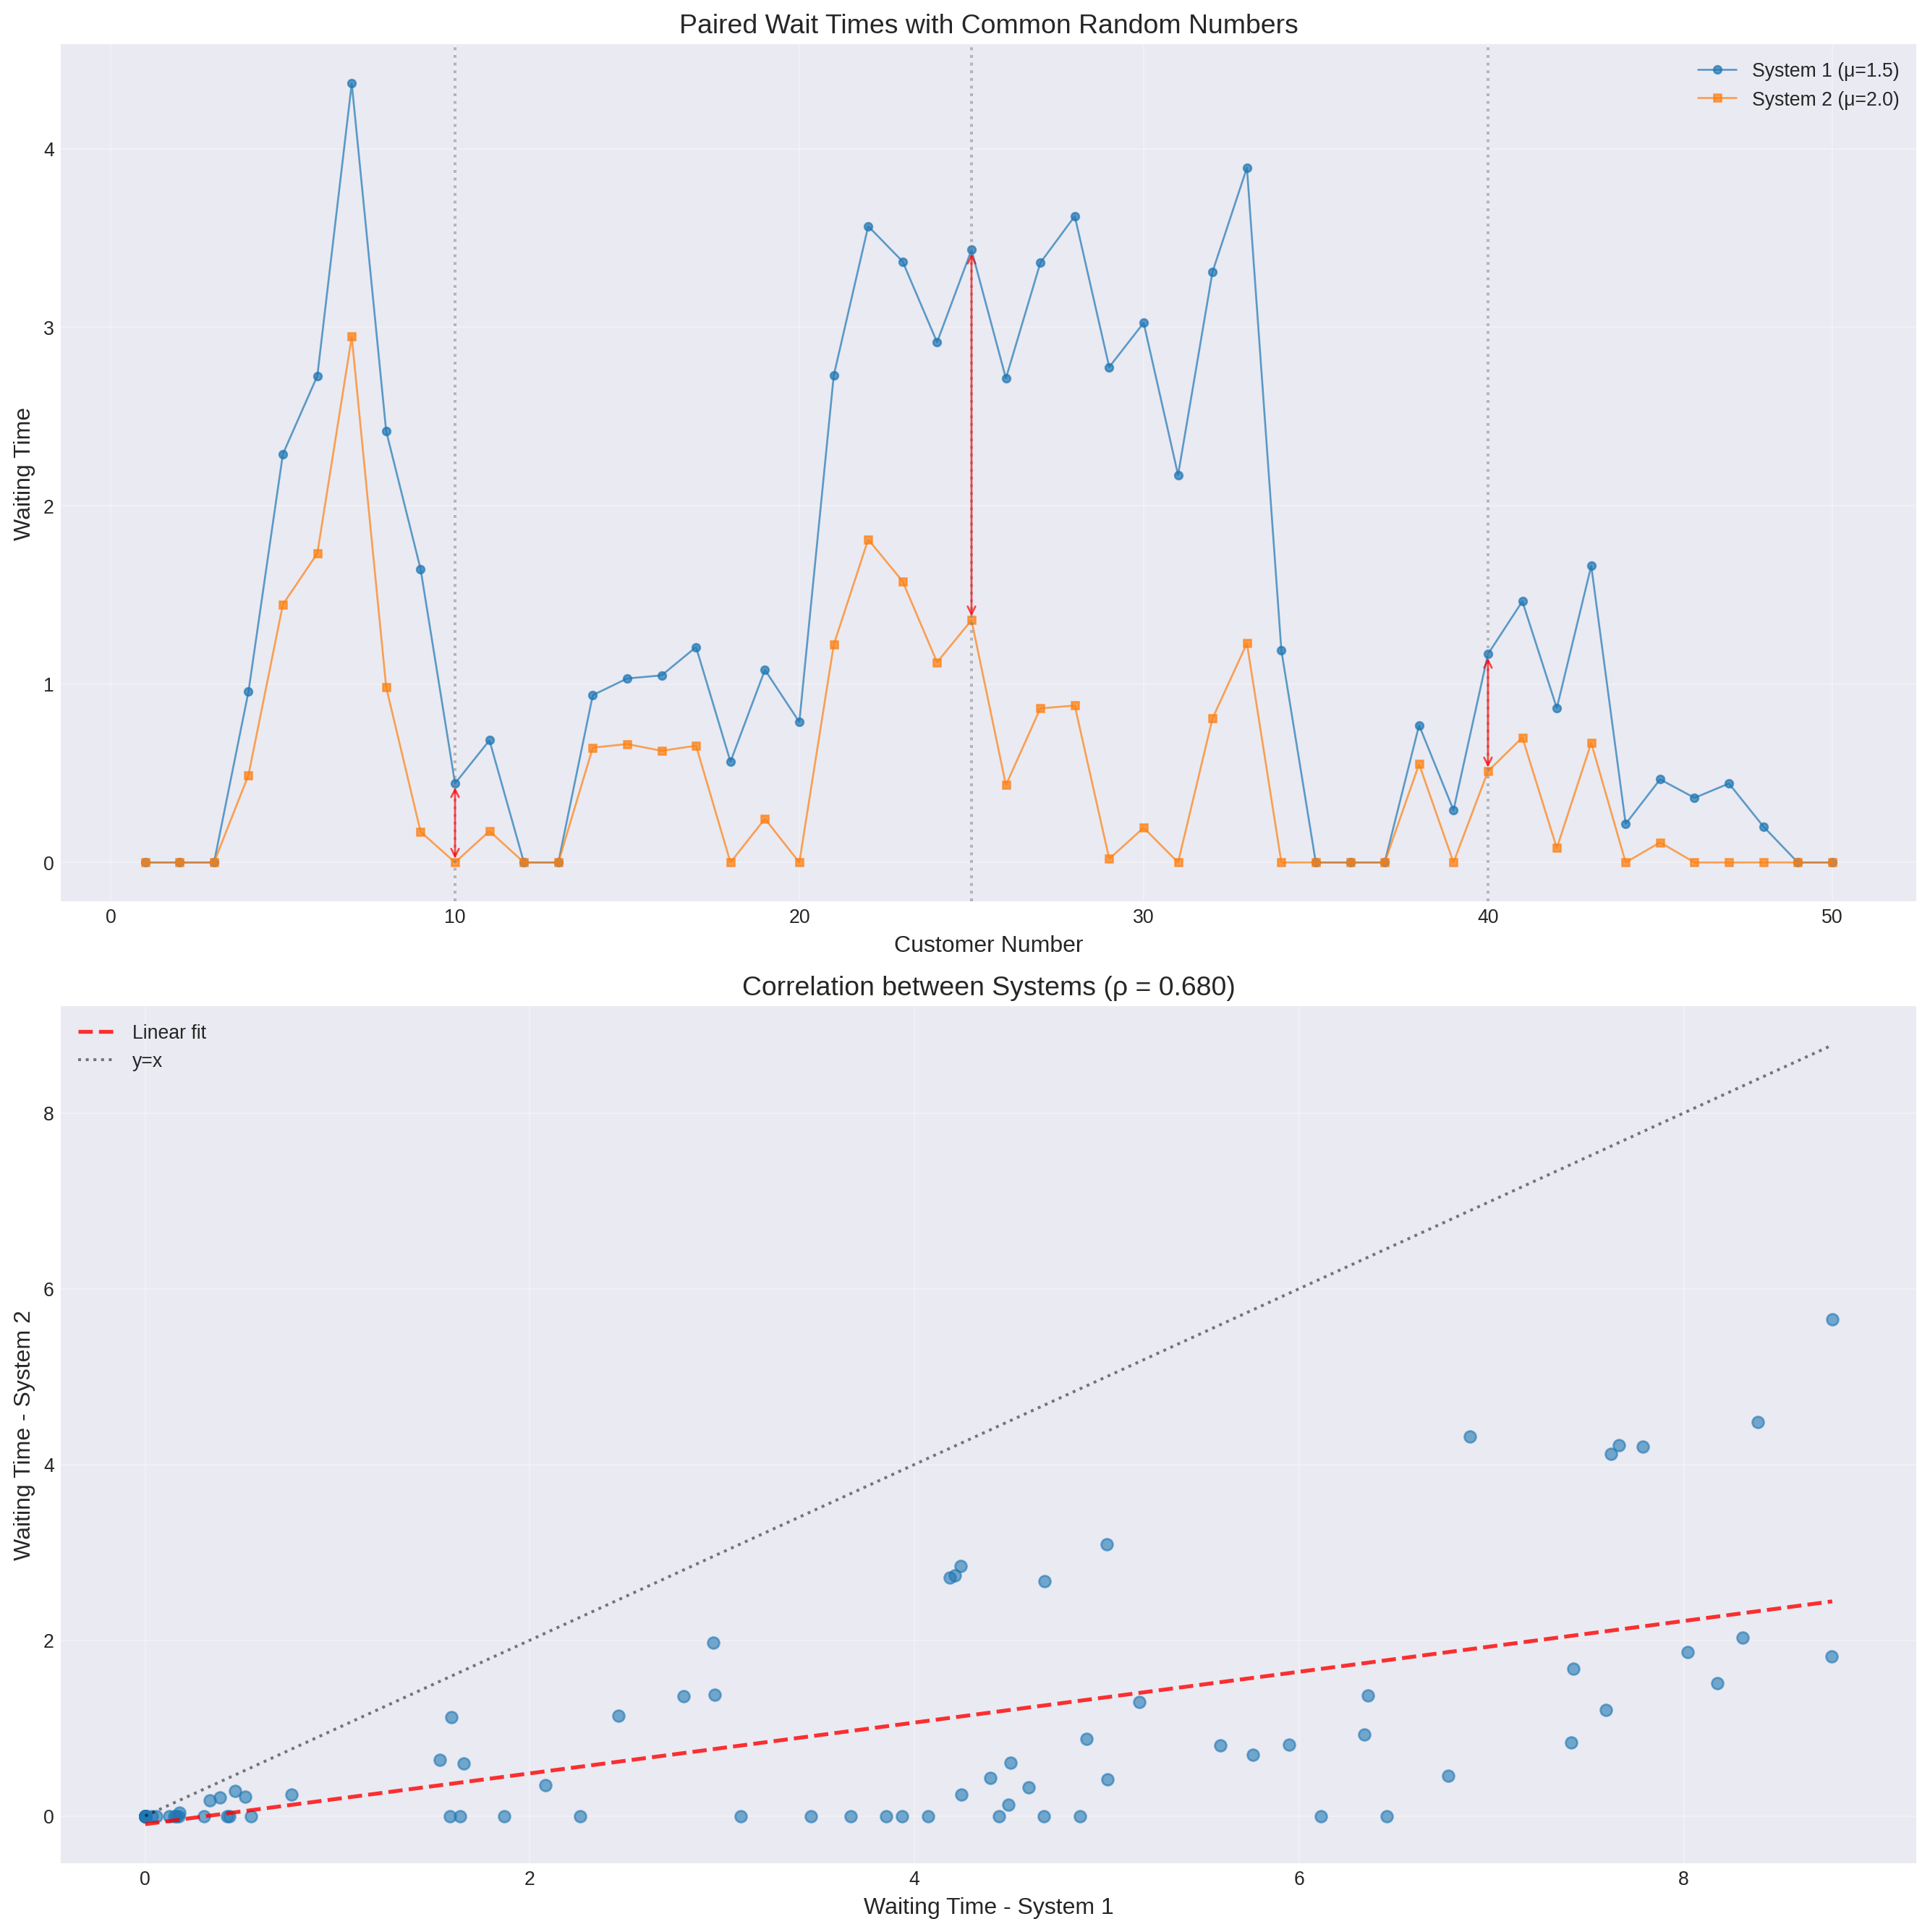


Example differences for highlighted customers:
  Customer 10: System 1 = 0.443, System 2 = 0.000, Difference = 0.443
  Customer 25: System 1 = 3.433, System 2 = 1.358, Difference = 2.075
  Customer 40: System 1 = 1.168, System 2 = 0.511, Difference = 0.657


In [10]:
#| echo: true
#| code-fold: true
#| code-summary: "Show visualization code"

# Generate a single simulation run for visualization
np.random.seed(42)
n_customers_viz = 50

# Generate common random numbers
inter_arrivals_viz = np.random.exponential(1/arrival_rate, n_customers_viz)
service_requirements_viz = np.random.exponential(1.0, n_customers_viz)

# Simulate both systems with CRN
wait_1_viz = simulate_mm1_queue(inter_arrivals_viz, service_requirements_viz, service_rate_1)
wait_2_viz = simulate_mm1_queue(inter_arrivals_viz, service_requirements_viz, service_rate_2)

# Create visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 14))
plt.style.use('seaborn-v0_8-darkgrid')

# Plot wait times for each customer
customer_numbers = np.arange(1, n_customers_viz + 1)

ax1.plot(customer_numbers, wait_1_viz, 'o-', alpha=0.7, label=f'System 1 (μ={service_rate_1})', 
         markersize=4, linewidth=1)
ax1.plot(customer_numbers, wait_2_viz, 's-', alpha=0.7, label=f'System 2 (μ={service_rate_2})', 
         markersize=4, linewidth=1)

# Add vertical lines to highlight specific customers
highlight_customers = [10, 25, 40]
for cust in highlight_customers:
    ax1.axvline(x=cust, color='gray', linestyle=':', alpha=0.5)
    # Add arrows showing the difference
    y1 = wait_1_viz[cust-1]
    y2 = wait_2_viz[cust-1]
    ax1.annotate('', xy=(cust, y2), xytext=(cust, y1),
                arrowprops=dict(arrowstyle='<->', color='red', alpha=0.7))

ax1.set_xlabel('Customer Number', fontsize=12)
ax1.set_ylabel('Waiting Time', fontsize=12)
ax1.set_title('Paired Wait Times with Common Random Numbers', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Demonstrate correlation with more samples
sample_size = 100
inter_arrivals_demo = np.random.exponential(1/arrival_rate, sample_size)
service_requirements_demo = np.random.exponential(1.0, sample_size)

wait_1_demo = simulate_mm1_queue(inter_arrivals_demo, service_requirements_demo, service_rate_1)
wait_2_demo = simulate_mm1_queue(inter_arrivals_demo, service_requirements_demo, service_rate_2)

correlation = np.corrcoef(wait_1_demo, wait_2_demo)[0, 1]

ax2.scatter(wait_1_demo, wait_2_demo, alpha=0.6)
ax2.set_xlabel('Waiting Time - System 1', fontsize=12)
ax2.set_ylabel('Waiting Time - System 2', fontsize=12)
ax2.set_title(f'Correlation between Systems (ρ = {correlation:.3f})', fontsize=14)
ax2.grid(True, alpha=0.3)

# Add regression line
z = np.polyfit(wait_1_demo, wait_2_demo, 1)
p = np.poly1d(z)
x_line = np.linspace(wait_1_demo.min(), wait_1_demo.max(), 100)
ax2.plot(x_line, p(x_line), "r--", alpha=0.8, linewidth=2, label='Linear fit')

# Add diagonal reference line
max_val = max(wait_1_demo.max(), wait_2_demo.max())
ax2.plot([0, max_val], [0, max_val], 'k:', alpha=0.5, label='y=x')
ax2.legend()

plt.tight_layout()
plt.show()

# Show the effectiveness of pairing
print(f"\nExample differences for highlighted customers:")
for cust in highlight_customers:
    diff = wait_1_viz[cust-1] - wait_2_viz[cust-1]
    print(f"  Customer {cust}: System 1 = {wait_1_viz[cust-1]:.3f}, "
          f"System 2 = {wait_2_viz[cust-1]:.3f}, Difference = {diff:.3f}")